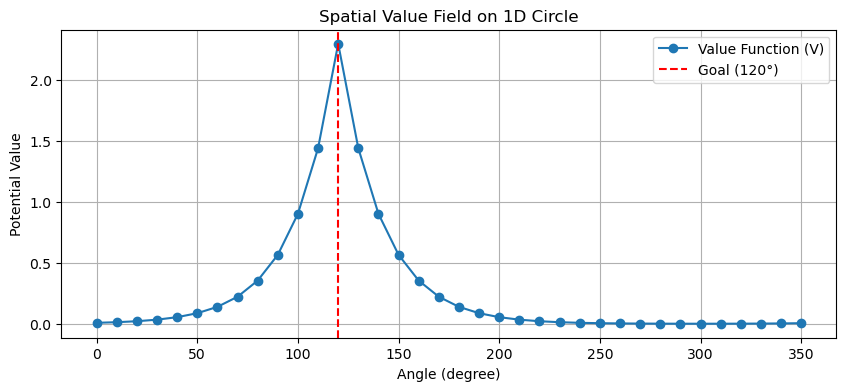

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def create_circle_laplacian(n):
    # 1D Circle의 인접 행렬 (A)
    A = np.zeros((n, n))
    for i in range(n):
        A[i, (i + 1) % n] = 1
        A[i, (i - 1) % n] = 1
    
    # 차수 행렬 (D)
    D = np.diag(np.sum(A, axis=1))
    
    # 라플라시안 (L)
    return D - A

# 1. 설정: 뉴런 36개 (각 10도씩)
n_neurons = 36
L = create_circle_laplacian(n_neurons)

# 2. SR 행렬 계산 (L의 역행렬 성질 이용)
# 실제로는 (I - gamma*T)^-1 형태를 사용하므로 약간의 Regularization(0.1) 추가
gamma = 0.9
M = np.linalg.inv(np.eye(n_neurons) - gamma * (np.eye(n_neurons) - 0.5 * L))

# 3. 목적지 설정 (120도 -> index 12)
goal_idx = 12
V = M[:, goal_idx]

# 시각화
plt.figure(figsize=(10, 4))
plt.plot(np.arange(0, 360, 10), V, 'o-', label='Value Function (V)')
plt.axvline(120, color='r', linestyle='--', label='Goal (120°)')
plt.title("Spatial Value Field on 1D Circle")
plt.xlabel("Angle (degree)")
plt.ylabel("Potential Value")
plt.legend()
plt.grid(True)
plt.show()

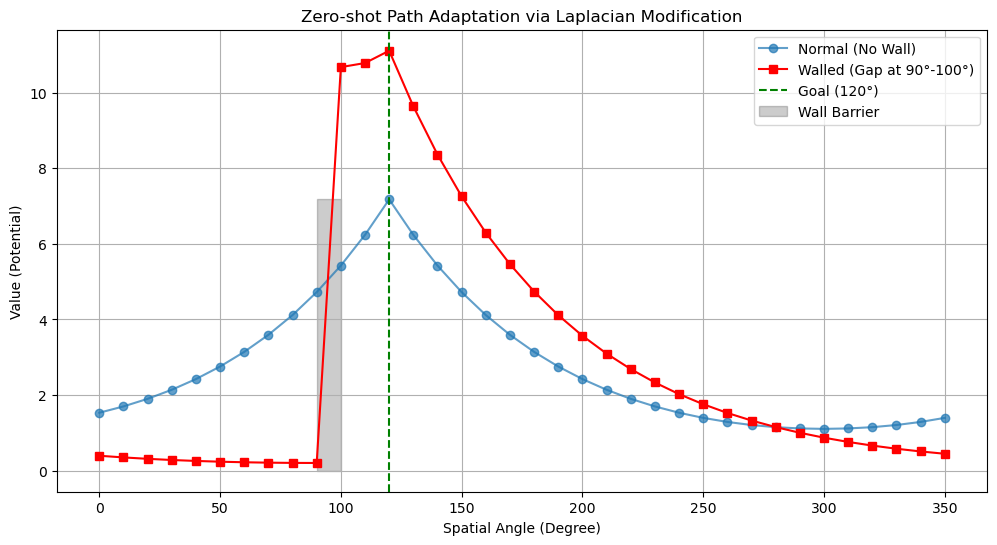

In [4]:
def solve_navigation(n, goal_idx, wall_edge=None):
    # 1. 기본 인접 행렬 (A) 생성
    A = np.zeros((n, n))
    for i in range(n):
        A[i, (i + 1) % n] = 1
        A[i, (i - 1) % n] = 1
    
    # 2. 벽 세우기 (국소 변형)
    if wall_edge:
        u, v = wall_edge
        A[u, v] = 0
        A[v, u] = 0
    
    # 3. 라플라시안(L) 및 전이행렬(T) 생성
    D = np.diag(np.sum(A, axis=1))
    L = D - A
    T = A / np.sum(A, axis=1)[:, None] # 확률 정규화
    
    # 4. SR 행렬 (M) 계산: M = (I - gamma * T)^-1
    gamma = 0.99
    M = np.linalg.inv(np.eye(n) - gamma * T)
    
    # 5. Value Function (V) 추출: 목적지 열(Column)만 뽑기
    V = M[:, goal_idx]
    return V

# 실험 실행
n = 36
goal = 12
v_normal = solve_navigation(n, goal)
v_walled = solve_navigation(n, goal, wall_edge=(9, 10)) # 90도-100도 사이 단절

# 시각화
plt.figure(figsize=(12, 6))
angles = np.arange(0, 360, 10)
plt.plot(angles, v_normal, 'o-', label='Normal (No Wall)', alpha=0.7)
plt.plot(angles, v_walled, 's-', label='Walled (Gap at 90°-100°)', color='red')
plt.axvline(120, color='green', linestyle='--', label='Goal (120°)')
plt.fill_between([90, 100], 0, max(v_normal), color='black', alpha=0.2, label='Wall Barrier')

plt.title("Zero-shot Path Adaptation via Laplacian Modification")
plt.xlabel("Spatial Angle (Degree)")
plt.ylabel("Value (Potential)")
plt.legend()
plt.grid(True)
plt.show()